In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from proj_3_module import *

# Plotting Time Series of Intensive Quantities

## Overview

In this section I graph the mean internal energy U and magnetization E against the number of MCMC simulation update steps for system sizes of 16x16 and 32x32. Since each lattice has a different amount of sites, a "updating step per site" or "sweep" is introduced so that the benchmarking can be fairly compared between different lattice sizes. This benchmark is defined as as:

\begin{align}
    t=\frac{\text{Total updates}}{\text{numbers of sites}}
\end{align}

I go about this simulation by first creating a completely random lattice and then taking the lattice through a number of update steps. I also store the appropriate parameter of the lattice at each step so that I can produce plots.

My goal is to figure out the convergence behavior of the different lattice sizes.

## Mean Internal Energy of L = 16

### Plot

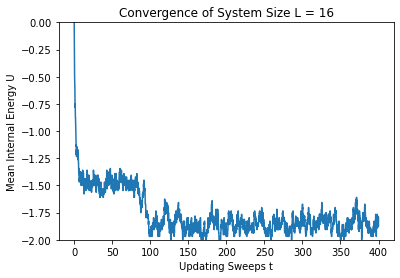

In [ ]:
L = 16
temp = 1.8
updates = 400*L**2+1

E_array = list()

lattice = random_lattice(L)

for x in range(0,updates):
    lattice = two_dim_ising_step(lattice,temp,1)
    if x%16 == 0:
        E_array.append(calculate_E(lattice)/(L**2))

steps = [i/L**2 for i in range(0,updates,16)]

plt.ylim(-2, 0)
plt.xlabel('Updating Sweeps t')
plt.ylabel('Mean Internal Energy U')
plt.title('Convergence of System Size L = 16')
plt.plot(steps,E_array)
plt.show()

### Observations

It seems that this simulated lattice for L = 16 converges after around 100 sweeps, or 25600 steps of the MCMC simulation.

## Mean Internal Energy of L = 32

### Plot

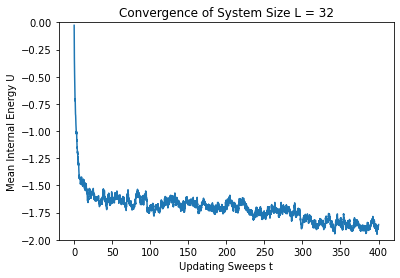

In [ ]:
L = 32
temp = 1.8
updates = 400*L**2+1

E_array = list()

lattice = random_lattice(L)

for x in range(0,updates):
    lattice = two_dim_ising_step(lattice,temp,1)
    if x%32 == 0:
        E_array.append(calculate_E(lattice)/(L**2))

steps = [i/L**2 for i in range(0,updates,32)]

plt.ylim(-2, 0)
plt.xlabel('Updating Sweeps t')
plt.ylabel('Mean Internal Energy U')
plt.title('Convergence of System Size L = 32')
plt.plot(steps,E_array)
plt.show()

### Observations

It seems that this simulated lattice for L = 32 converges after around 300 sweeps, or 307200 steps of the MCMC simulation.

## Magnetization of L = 16

### Plot

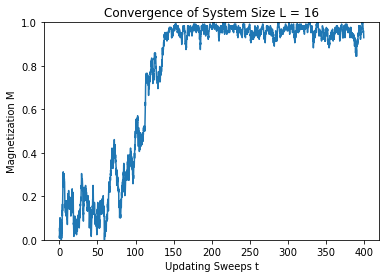

In [ ]:
L = 16
temp = 1.8
updates = 400*L**2+1
S_array = list()

lattice = random_lattice(L)

for x in range(0,updates):
    lattice = two_dim_ising_step(lattice,temp,1)
    if x%16 == 0:
        S_array.append(calculate_S(lattice)/(L**2))

steps = [i/L**2 for i in range(0,updates,16)]

plt.ylim(0, 1)
plt.xlabel('Updating Sweeps t')
plt.ylabel('Magnetization M')
plt.title('Convergence of System Size L = 16')
plt.plot(steps,S_array)
plt.show()

### Observations

It seems that this simulated lattice for L = 16 converges after around 150 sweeps, or 38400 steps of the MCMC simulation.

## Magnetization of L = 32

### Plot

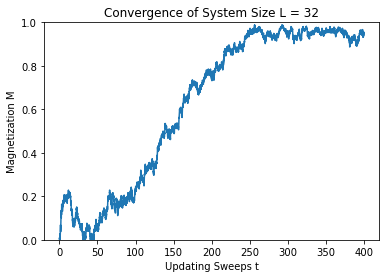

In [ ]:
L = 32
temp = 1.8
updates = 400*L**2+1
S_array = list()

lattice = random_lattice(L)

for x in range(0,updates):
    lattice = two_dim_ising_step(lattice,temp,1)
    if x%32 == 0:
        S_array.append(calculate_S(lattice)/(L**2))

steps = [i/L**2 for i in range(0,updates,32)]

plt.ylim(0, 1)
plt.xlabel('Updating Sweeps t')
plt.ylabel('Magnetization M')
plt.title('Convergence of System Size L = 32')
plt.plot(steps,S_array)
plt.show()

### Observations

It seems that this simulated lattice for L = 32 converges after around 250 sweeps, or 256000 steps of the MCMC simulation.

## Closing Comments

After looking at the simulated lattices' plots, it seems that for larger lattices, it takes longer for the MCMC simulation to achieve convergence. This is true if we look at the sheer number of MCMC simulation steps as well as if we look at our benchmarking "sweep." Each parameter we investigated took more sweeps to reach convergence for larger system sizes.

# Magnetization Curves for Different Lattice Sizes

## Overview

In this section, I plot the magnetization of different lattice sizes against the temperature of the lattice. I do this by generating a random lattice for each of my desired system sizes and then starting the lattices at a high temperature. After running enough sweeps of the MCMC simulation so that the lattices are at equilibrium, I note the magnetization and then reduce the temperature slightly. I continue this process until I have magnetization data for an entire range of temperatures.

The goal of this is to find out the behavior of the magnetization of different lattice sizes when compared to Onsager's Exact Solution which gives a theoretical value of magnetization for the thermodynamic limit $N\to\infty$. 

Onsager's Exact Solution is defined as:

\begin{align}
M(T)& = \begin{cases}\Bigl[1 - \sinh^{-4}\bigl(2/T\bigr)\Bigr]^{1/8},& T<T_c\\
0,& T\geq T_c
\end{cases}
\end{align}

## Code for Generating Plots

In [ ]:
x_axis = np.linspace(1, 4, 30)
y_axis = [Onsager(x) for x in x_axis]
###

cool_down_temps = x_axis[::-1]

s_array8 = list()

print('Loading(#/29): ',end = '')

lattice = random_lattice(8)

for x in range(len(x_axis)):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,cool_down_temps[x],25*8*8)
    s_array8.append(calculate_S(lattice)/(8**2))

Loading(#/29): 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [ ]:
x_axis = np.linspace(1, 4, 30)
y_axis = [Onsager(x) for x in x_axis]
###

cool_down_temps = x_axis[::-1]

s_array16 = list()

lattice = random_lattice(16)

print('Loading(#/29): ',end = '')

for x in range(len(x_axis)):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,cool_down_temps[x],100*16**2)
    s_array16.append(calculate_S(lattice)/(16**2))

Loading(#/29): 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [ ]:
x_axis = np.linspace(1, 4, 30)
y_axis = [Onsager(x) for x in x_axis]
###

cool_down_temps = x_axis[::-1]

s_array32 = list()

lattice = random_lattice(32)

print('Loading(#/29): ',end = '')

for x in range(len(x_axis)):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,cool_down_temps[x],400*32**2)
    s_array32.append(calculate_S(lattice)/(32**2))

Loading(#/29): 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [ ]:
x_axis = np.linspace(1, 4, 30)
y_axis = [Onsager(x) for x in x_axis]
###

cool_down_temps = x_axis[::-1]

s_array64 = list()

lattice = random_lattice(64)

print('Loading(#/29): ',end = '')

for x in range(len(x_axis)):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,cool_down_temps[x],1600*64**2)
    s_array64.append(calculate_S(lattice)/(64**2))

Loading(#/29): 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

## Individual Plots

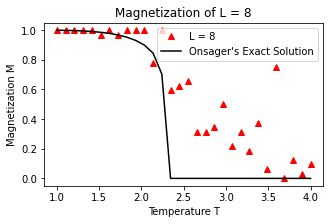

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(cool_down_temps,s_array8,'^',color = 'red',label = 'L = 8')
plt.plot(x_axis, y_axis, '-', color="black", label='Onsager\'s Exact Solution')

plt.title('Magnetization of L = 8')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.legend()

plt.show()

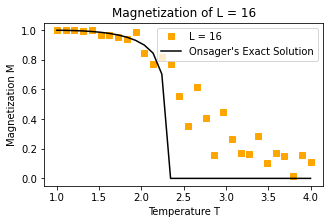

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(cool_down_temps,s_array16,'s',color = 'orange',label = 'L = 16')
plt.plot(x_axis, y_axis, '-', color="black", label='Onsager\'s Exact Solution')

plt.title('Magnetization of L = 16')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.legend()

plt.show()

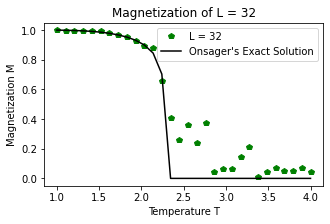

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(cool_down_temps,s_array32,'p',color = 'green', label = 'L = 32')
plt.plot(x_axis, y_axis, '-', color="black", label='Onsager\'s Exact Solution')

plt.title('Magnetization of L = 32')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.legend()

plt.show()

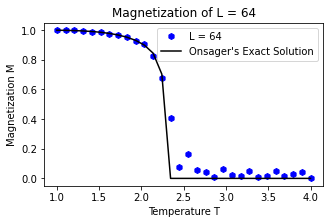

In [ ]:
plt.figure(figsize=(5,3))

plt.plot(cool_down_temps,s_array64,'h',color = 'blue',label = 'L = 64')
plt.plot(x_axis, y_axis, '-', color="black", label='Onsager\'s Exact Solution')

plt.title('Magnetization of L = 64')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.legend()

plt.show()

## Combined Plot

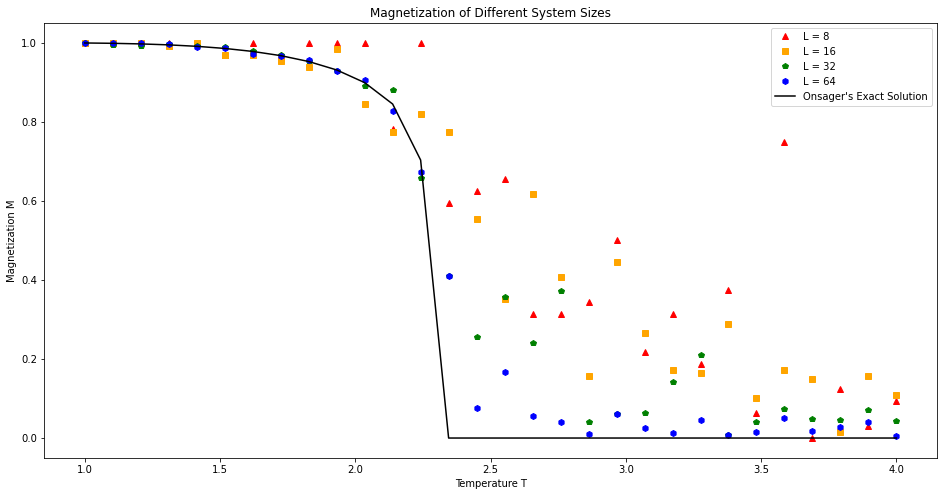

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(cool_down_temps,s_array8,'^',color = 'red',label = 'L = 8')
plt.plot(cool_down_temps,s_array16,'s',color = 'orange',label = 'L = 16')
plt.plot(cool_down_temps,s_array32,'p',color = 'green', label = 'L = 32')
plt.plot(cool_down_temps,s_array64,'h',color = 'blue',label = 'L = 64')
plt.plot(x_axis, y_axis, '-', color="black", label='Onsager\'s Exact Solution')

plt.title('Magnetization of Different System Sizes')
plt.xlabel('Temperature T')
plt.ylabel('Magnetization M')
plt.legend()

plt.show()

## Closing Remarks

It seems that the behavior of the magnetization for each lattice size is different when compared to each other and to Onsager's Exact Solution. Specifically, for smaller lattice sizes, the magnetization does not follow Onsager's very well whereas larger lattice sizes follow much more closely. This makes sense because Onsager's is supposed to be the theoretical solution in the thermodynamic limit $N\to\infty$.

In addition, the smaller lattice sizes seem to transition from 0 to 1 magnetization when cooling down in a gradual, linear way while the larger lattice sizes have a sharper transition close to the critical temperature.

# Typical Spin Configuration at Different Temperatures

## Overview

In this section I examine the typical spin configuration of a lattice of size L = 256 at different temperatures. I do this by first generating a random lattice and then having the lattice experience a large number of MCMC simulation sweeps at a given temperature until the randomized lattice approaches what the spin configuration should resemble at the given temperatures.

The resulting lattices are represented by a diagram where spin up states are white squares and spin down states are black squares.

## Temperature T = 1.8 (Below Critical Temperature)

Loading(#/9): 0 1 2 3 4 5 6 7 8 9 
Total Sweeps done: 1000


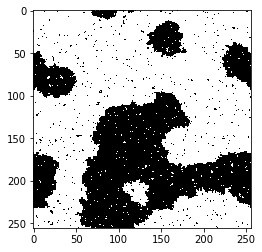

In [ ]:
system_size_L = 256
lattice = random_lattice(system_size_L)
sweep_count = 0

print('Loading(#/9): ',end = '')
for x in range(10):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,1.8,100*system_size_L**2)
    sweep_count += 100

print('')
print('Total Sweeps done:',sweep_count)
    
#black = -1 and white = 1
colormap = mpl.colors.ListedColormap(['black', 'white'])
img = plt.imshow(lattice, interpolation='none', cmap = colormap)

## Temperature T = 2.3 (Near Critical Temperature)

Loading(#/9): 0 1 2 3 4 5 6 7 8 9 
Total Sweeps done: 1000


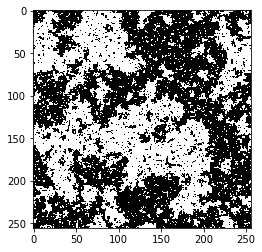

In [ ]:
system_size_L = 256
lattice = random_lattice(system_size_L)
sweep_count = 0

print('Loading(#/9): ',end = '')
for x in range(10):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,2.3,100*system_size_L**2)
    sweep_count += 100

print('')
print('Total Sweeps done:',sweep_count)
    
#black = -1 and white = 1
colormap = mpl.colors.ListedColormap(['black', 'white'])
img = plt.imshow(lattice, interpolation='none', cmap = colormap)

## Temperature T = 4.0 (Above Critical Temperature)

Loading(#/9): 0 1 2 3 4 5 6 7 8 9 
Total Sweeps done: 1000


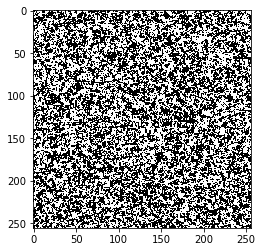

In [ ]:
system_size_L = 256
lattice = random_lattice(system_size_L)
sweep_count = 0

print('Loading(#/9): ',end = '')
for x in range(10):
    print(x,end = ' ')
    lattice = two_dim_ising_step(lattice,4.0,100*system_size_L**2)
    sweep_count += 100

print('')
print('Total Sweeps done:',sweep_count)
    
#black = -1 and white = 1
colormap = mpl.colors.ListedColormap(['black', 'white'])
img = plt.imshow(lattice, interpolation='none', cmap = colormap)

## Closing Remarks

It seems that the simulated lattice at T = 1.8 had many regions of aligned spin, either up or down. For T = 2.3, the regions are much less defined and almost seem as if they're breaking down when compared to the T = 1.8 lattice (or if you compare to the T = 4.0 lattice you could say that the regions are beginning to form). The lattice for T = 4.0 is very chaotic and has no regions where the spins are aligned.

Physically, since our lattices are supposed to represent ferromagnetic materials, we may be able to say that that at low temperatures (T = 1.8 lattice), the magnetic spins of the material tend to align. This means that the material has the qualities of a magnet. At the critical temperature, we see the regions of spin break down and this corresponds with a phase transition of the ferromagnet. For high temperatures (T = 4.0 lattice), the thermal fluctuations will destroy any possible alignment and the material is no longer magnetic.

End of Notebook